# Example script: load LE data and plot Nino 3.4

This is a basic script that loads output from a large ensemble, does some simple processing, and plots the result.

**Please use the *Pangeo (2019.09.12 - py3.7)* environment.** The standard Python 3 environment does not provide all necessary packages. Of course you can also use your own custom environment.

## Setup
### load required packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import numpy as np
# from scipy.io import netcdf
# import scipy.stats as stats
import pandas as pd

import xarray as xr
# import random
import os
from pprint import pprint
from tqdm import tqdm

# # Import Cdo-py
# import cdo
# cdo = cdo.Cdo() #


    


## set paths

In [2]:
# directories with SMILE output
basedir_MMLEA = '/glade/collections/cdg/data/CLIVAR_LE/'
basedir_cmip6_ensembles = '/glade/scratch/rwills/cmip6_ensembles/'

# directory for saving plots
plotdir = './plots/test/'
if not os.path.exists(plotdir):
    os.makedirs(plotdir)
    



## List available data

In [3]:
# list contents of MMLEA archive
os.listdir(basedir_MMLEA)

['csiro_mk36_lens',
 'olens_mckinnon',
 'cesm_lens',
 'CVDP-LE',
 'gfdl_cm3_lens',
 'ec_earth_lens',
 'canesm2_lens',
 'gfdl_esm2m_lens',
 'mpi_lens',
 'olens_mckinnon_update_08142019']

In [4]:
# list available CMIP SMILEs

# ignores hidden files and folder with temporary data
[f for f in os.listdir(basedir_cmip6_ensembles) if not f.startswith(('.','model_variants','native_grid','unsorted'))]


['ec-earth3_lens',
 'ukesm1_lens',
 'giss_e21h_lens',
 'cnrm_cm6_lens',
 'miroc6_lens',
 'norcpm1_lens',
 'cesm2_lens',
 'canesm5_lens',
 'access_lens',
 'giss_e21g_lens',
 'miroc_esm2l_lens',
 'ipsl_cm6a_lens']

In [5]:
# explore cesm_lens data in more detail
filelist = os.listdir(basedir_MMLEA+'cesm_lens/Amon/ts/')
filelist.sort()
pprint(filelist)

['ts_Amon_CESM1-CAM5_historical_rcp45_r10i1p1_192001-208012.nc',
 'ts_Amon_CESM1-CAM5_historical_rcp45_r11i1p1_192001-208012.nc',
 'ts_Amon_CESM1-CAM5_historical_rcp45_r12i1p1_192001-208012.nc',
 'ts_Amon_CESM1-CAM5_historical_rcp45_r13i1p1_192001-208012.nc',
 'ts_Amon_CESM1-CAM5_historical_rcp45_r14i1p1_192001-208012.nc',
 'ts_Amon_CESM1-CAM5_historical_rcp45_r15i1p1_192001-208012.nc',
 'ts_Amon_CESM1-CAM5_historical_rcp45_r1i1p1_185001-208012.nc',
 'ts_Amon_CESM1-CAM5_historical_rcp45_r1i1p1_192001-208012.nc',
 'ts_Amon_CESM1-CAM5_historical_rcp45_r2i1p1_192001-208012.nc',
 'ts_Amon_CESM1-CAM5_historical_rcp45_r3i1p1_192001-208012.nc',
 'ts_Amon_CESM1-CAM5_historical_rcp45_r4i1p1_192001-208012.nc',
 'ts_Amon_CESM1-CAM5_historical_rcp45_r5i1p1_192001-208012.nc',
 'ts_Amon_CESM1-CAM5_historical_rcp45_r6i1p1_192001-208012.nc',
 'ts_Amon_CESM1-CAM5_historical_rcp45_r7i1p1_192001-208012.nc',
 'ts_Amon_CESM1-CAM5_historical_rcp45_r8i1p1_192001-208012.nc',
 'ts_Amon_CESM1-CAM5_historical_rc

**Note:**
CESM has 5 members starting in 1850 and 40 starting in 1920. The members starting in 1850 appear twice in the list of files. Be careful not to load all files in the directory!


## load CESM-LENS tas

### single member

In [6]:
filepath = basedir_MMLEA + 'cesm_lens/Amon/tas/'

Use XArray to load a single member. *['tas']* in the end selects the data variable *tas*.

In [7]:
r1_test = xr.open_dataset(filepath + 'tas_Amon_CESM1-CAM5_historical_rcp45_r1i1p1_185001-208012.nc')['tas']
# change time axis to standard datetime format that works better with XArray
r1_test['time'] = r1_test.indexes['time'].to_datetimeindex()

/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  This is separate from the ipykernel package so we can avoid doing imports until


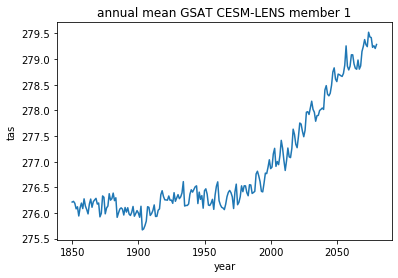

In [8]:
# compute global mean, annual mean and plot
r1_test.mean(dim='lat').mean(dim='lon').groupby('time.year').mean('time').plot()
plt.title('annual mean GSAT CESM-LENS member 1');

### all members
Load all 40 members and merge into an array with an ensemble dimension

In [9]:
var = 'tas'
filepath = basedir_MMLEA + 'cesm_lens/Amon/'+var+'/'

cesm_lens_tas = xr.open_mfdataset(filepath + '*192001-210012.nc',combine='nested',concat_dim='ensemble')[var]

# change time axis to standard datetime format that works better with XArray
cesm_lens_tas['time'] = cesm_lens_tas.indexes['time'].to_datetimeindex()

/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  import sys


In [10]:
cesm_lens_tas

<xarray.DataArray 'tas' (ensemble: 39, time: 2172, lat: 289, lon: 288)>
dask.array<shape=(39, 2172, 289, 288), dtype=float32, chunksize=(1, 2172, 289, 288)>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 88.12 89.06 90.0
    height   float64 2.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) datetime64[ns] 1920-01-16T12:00:00 ... 2100-12-16T12:00:00
Dimensions without coordinates: ensemble
Attributes:
    standard_name:   air_temperature
    long_name:       air_temperature
    units:           K
    comment:         Created using NCL code
    history:         Added height coordinate
    original_units:  K
    original_name:   TREFHT
    cell_methods:    time: mean (interval: 1 month)

### compute & plot GSAT

In [17]:
# compute global mean, annual mean and plot
cesm_lens_tas_globalmean = cesm_lens_tas.mean(dim='lat').mean(dim='lon').groupby('time.year').mean('time')

In [13]:
cesm_lens_tas_globalmean

<xarray.DataArray 'tas' (ensemble: 39, year: 181)>
dask.array<shape=(39, 181), dtype=float32, chunksize=(1, 1)>
Coordinates:
    height   float64 2.0
  * year     (year) int64 1920 1921 1922 1923 1924 ... 2096 2097 2098 2099 2100
Dimensions without coordinates: ensemble

Text(0.5, 1.0, 'CESM-LENS GSAT (historical + RCP8.5)')

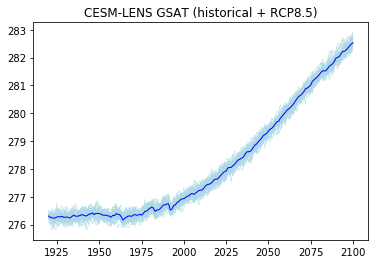

In [21]:
plt.plot(cesm_lens_tas_globalmean['year'],cesm_lens_tas_globalmean.transpose(),color='lightblue',linewidth=0.5);
plt.plot(cesm_lens_tas_globalmean['year'],cesm_lens_tas_globalmean.mean(dim='ensemble'),color='blue',linewidth=1);
plt.title('CESM-LENS GSAT (historical + RCP8.5)')